In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import algo
import json

2022-12-18 17:30:12.134294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [113]:
path = 'tm'
tms_params = {}
tms = {}
for r,d,f in os.walk(path):
    for file in f:
        if "target_model_params.json" in file:
            with open(path+'/'+file) as json_file:
                tms[file] = json.load(json_file)
            

In [114]:
df = pd.DataFrame.from_dict(tms, orient='index')
# df = df.loc[df['max_iter']==100].loc[df['n_classes']==100].loc[df['alpha']==0.001].loc[df['lambda_']==0.00001].loc[df['tolerance']==0.00001].loc[df['C']==1].loc[df['delta']==0.00001]        
df.shape

(558, 15)

In [115]:
a = df.loc[df['DP']==True].loc[df['test_acc']>0.46]
a

,n_classes,alpha,max_iter,lambda_,tolerance,DP,L,C,epsilon,delta,train_acc,test_acc,attack_acc,attack_pre,attack_rec
rs42_lr0.001_iter500_reg1e-05_DPTrue_eps50000_L5_target_model_params.json,100,0.001,500,0.00001,0.00001,True,5,1.0,50000.0,0.00001,0.7220,0.4733,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.0005_DPTrue_eps50000_L5_target_model_params.json,100,0.001,500,0.00050,0.00001,True,5,1.0,50000.0,0.00001,0.7194,0.4681,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.0005_DPTrue_eps100000_L5_target_model_params.json,100,0.001,500,0.00050,0.00001,True,5,1.0,100000.0,0.00001,0.7275,0.4652,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.001_DPTrue_eps100000_L5_target_model_params.json,100,0.001,500,0.00100,0.00001,True,5,1.0,100000.0,0.00001,0.7234,0.4637,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.0001_DPTrue_eps50000_L5_target_model_params.json,100,0.001,500,0.00010,0.00001,True,5,1.0,50000.0,0.00001,0.7199,0.4710,NaN,NaN,NaN
rs42_lr0.001_iter500_reg1e-05_DPTrue_eps100000_L5_target_model_params.json,100,0.001,500,0.00001,0.00001,True,5,1.0,100000.0,0.00001,0.7328,0.4705,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.0001_DPTrue_eps100000_L5_target_model_params.json,100,0.001,500,0.00010,0.00001,True,5,1.0,100000.0,0.00001,0.7323,0.4698,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.001_DPTrue_eps50000_L5_target_model_params.json,100,0.001,500,0.00100,0.00001,True,5,1.0,50000.0,0.00001,0.7152,0.4667,0.51185,0.730994,0.0375


In [92]:
a = df.loc[df['DP']==True].loc[df['test_acc']>0.47]
# plt.plot(a['test_acc'])
a

,n_classes,alpha,max_iter,lambda_,tolerance,DP,L,C,epsilon,delta,train_acc,test_acc,attack_acc,attack_pre,attack_rec
rs42_lr0.001_iter500_reg1e-05_DPTrue_eps50000_L5_target_model_params.json,100,0.001,500,0.00001,0.00001,True,5,1,50000.0,0.00001,0.7220,0.4733,NaN,NaN,NaN
rs42_lr0.001_iter500_reg0.0001_DPTrue_eps50000_L5_target_model_params.json,100,0.001,500,0.00010,0.00001,True,5,1,50000.0,0.00001,0.7199,0.4710,NaN,NaN,NaN
rs42_lr0.001_iter500_reg1e-05_DPTrue_eps100000_L5_target_model_params.json,100,0.001,500,0.00001,0.00001,True,5,1,100000.0,0.00001,0.7328,0.4705,NaN,NaN,NaN


In [28]:
baseline = df.loc[df['DP']==False]

In [32]:
baseline.loc[baseline['test_acc']>0.5]

,n_classes,alpha,max_iter,lambda_,tolerance,DP,L,C,epsilon,delta,train_acc,test_acc,attack_acc,attack_pre,attack_rec
rs13_lr0.001_iter100_reg0.005_DPFalse_target_model_params.json,100,0.001,100,5.000000e-03,0.00001,False,10,1,0.0,0.00001,0.8257,0.5350,0.50270,0.741071,0.0083
rs42_lr0.001_iter100_reg0.005_DPFalse_target_model_params.json,100,0.001,100,5.000000e-03,0.00001,False,10,1,0.0,0.00001,0.8271,0.5255,0.50300,0.745902,0.0091
rs1_lr0.001_iter100_reg0.01_DPFalse_target_model_params.json,100,0.001,100,1.000000e-02,0.00001,False,10,1,0.0,0.00001,0.7816,0.5028,0.50060,0.620000,0.0031
rs42_lr0.001_iter100_reg0.0001_DPFalse_target_model_params.json,100,0.001,100,1.000000e-04,0.00001,False,10,1,0.0,0.00001,0.8748,0.5545,0.51060,0.780423,0.0295
rs1_lr0.001_iter100_reg1e-07_DPFalse_target_model_params.json,100,0.001,100,1.000000e-07,0.00001,False,10,1,0.0,0.00001,0.8691,0.5614,0.50830,0.700483,0.0290
rs42_lr0.001_iter100_reg0.0005_DPFalse_target_model_params.json,100,0.001,100,5.000000e-04,0.00001,False,10,1,0.0,0.00001,0.8688,0.5478,0.50975,0.773109,0.0276
rs42_lr0.001_iter100_reg0.001_DPFalse_target_model_params.json,100,0.001,100,1.000000e-03,0.00001,False,10,1,0.0,0.00001,0.8658,0.5489,0.50815,0.765472,0.0235
rs13_lr0.001_iter100_reg0.001_DPFalse_target_model_params.json,100,0.001,100,1.000000e-03,0.00001,False,10,1,0.0,0.00001,0.8644,0.5601,0.50785,0.760797,0.0229
rs24_lr0.001_iter100_reg1e-05_DPFalse_target_model_params.json,100,0.001,100,1.000000e-05,0.00001,False,1,1,0.0,0.00001,0.9999,0.5521,0.85215,0.810949,0.9184
rs42_lr0.001_iter100_reg1e-08_DPFalse_target_model_params.json,100,0.001,100,1.000000e-08,0.00001,False,10,1,0.0,0.00001,0.8726,0.5517,0.51095,0.777215,0.0307


In [100]:
mean_results = pd.DataFrame(columns = baseline.drop(['train_acc','test_acc'], axis=1).columns)
new_df = baseline.drop(['train_acc','test_acc'], axis=1).iloc[0]
new_df['train_acc_mean'] = baseline['train_acc'].mean()
new_df['train_acc_std'] = baseline['train_acc'].std()
new_df['test_acc_mean'] = baseline['test_acc'].mean()
new_df['test_acc_std'] = baseline['test_acc'].std()
mean_results = mean_results.append(new_df)

/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/719633128.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(new_df)


In [101]:
L_list = df['L'].unique()
epsilon_list = df['epsilon'].unique()

for L in L_list:
    for epsilon in epsilon_list:
        select = df.loc[df['DP']==True].loc[df['L']==L].loc[df['epsilon']==epsilon]
        if select.shape[0] != 0:
            temp = select.drop(['train_acc','test_acc'], axis=1).iloc[0]
            temp['train_acc_mean'] = select['train_acc'].mean()
            temp['train_acc_std'] = select['train_acc'].std()
            temp['test_acc_mean'] = select['test_acc'].mean()
            temp['test_acc_std'] = select['test_acc'].std()
            mean_results = mean_results.append(temp)
                
mean_results.shape         

/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included i

/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included i

/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_results = mean_results.append(temp)
/var/folders/66/0p0lnj8d6zj532q0yvm1zt580000gn/T/ipykernel_40394/1229830189.py:13: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included i

(131, 14)

In [102]:
# sort
mean_results = mean_results.sort_values(by=['epsilon'])

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Text(0, 0.5, 'accuracy')

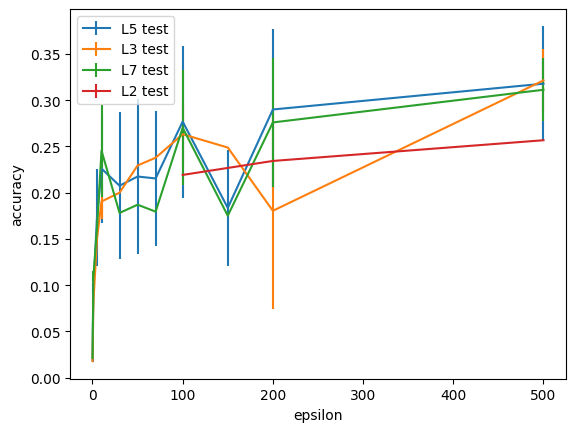

In [116]:
L_res = {}
for L in L_list:
    L_res[L] = mean_results.loc[mean_results['L']==L].loc[mean_results['DP']==True].loc[mean_results['epsilon']<1000]
    
    if max(L_res[L]['test_acc_mean'])>0.25:
        plt.errorbar(L_res[L]['epsilon'], L_res[L]['test_acc_mean'], L_res[L]['test_acc_std'], label='L'+str(L)+' test')
#         plt.errorbar(L_res[L]['epsilon'], L_res[L]['train_acc_mean'], L_res[L]['train_acc_std'], label='L'+str(L)+' train')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('accuracy')   

In [1]:
a = df.loc[df['DP']==True].loc[df['test_acc']>0.4]
# plt.plot(a['test_acc'])
a

NameError: name 'df' is not defined

# FL

In [116]:
path = 'fl'
params = {}
results = {}
for r,d,f in os.walk(path):
    for file in f:
        if "params.json" in file:
            with open(r+'/'+file) as json_file:
                params[r] = json.load(json_file)
        elif "results.csv" in file:
            results[r] = pd.read_csv(r+'/'+file)
            it = []
            client = []
            for k in results[r]['Unnamed: 0']:
                it.append(k[k.find('i')+1:k.find('_')])
                client.append(k[k.find('_')+1:])
            results[r]['it'] = it
            results[r]['client'] = client



fl/rs42_ncl2_fiter5_lr0.01_iter50_reg1e-05_DPFalse
0.5636
fl/rs42_ncl2_fiter5_lr0.01_iter100_reg1e-05_DPFalse
0.5574
fl/rs42_ncl2_fiter5_lr0.01_iter150_reg1e-05_DPFalse
0.5524
fl/rs42_ncl2_fiter5_lr0.01_iter200_reg1e-05_DPFalse
0.5495
fl/rs42_ncl2_fiter5_lr0.01_iter50_reg0.005_DPFalse
0.5346
fl/rs42_ncl2_fiter5_lr0.01_iter100_reg0.005_DPFalse
0.5277
fl/rs42_ncl2_fiter5_lr0.01_iter150_reg0.005_DPFalse
0.5262
fl/rs42_ncl2_fiter5_lr0.01_iter200_reg0.005_DPFalse
0.5267


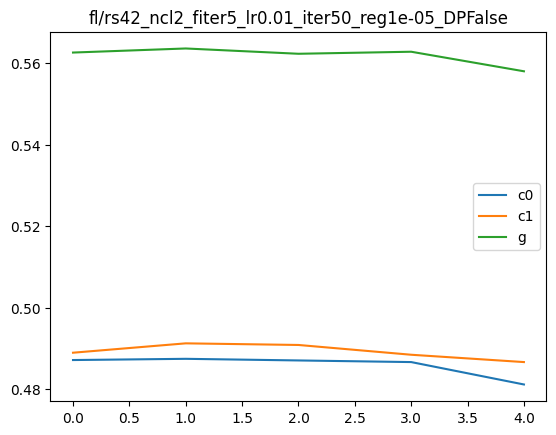

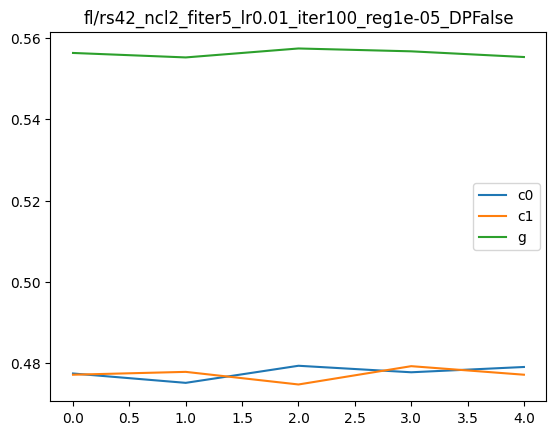

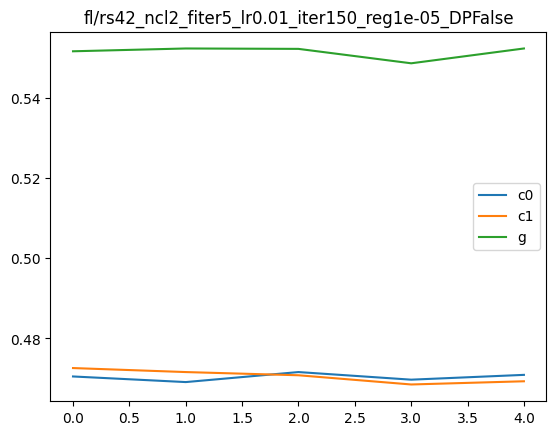

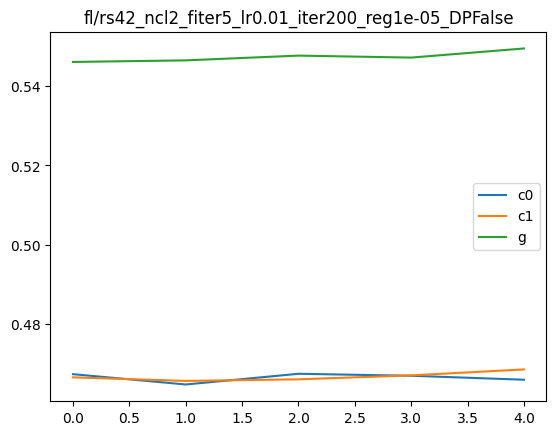

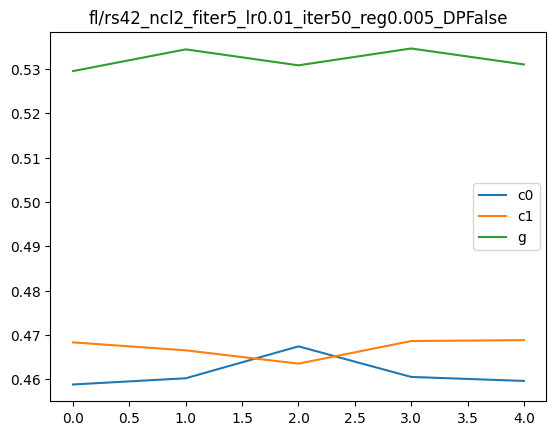

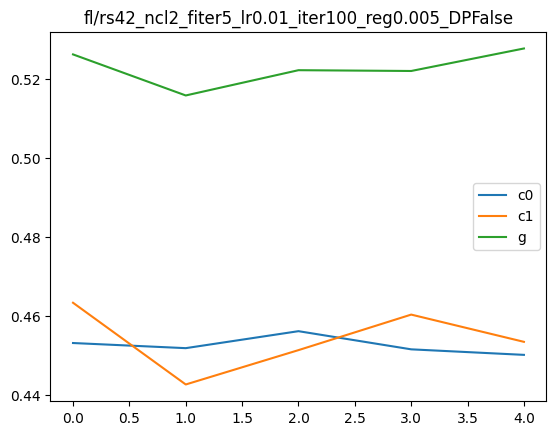

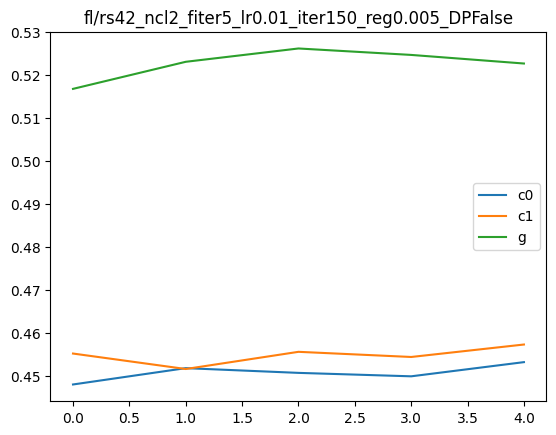

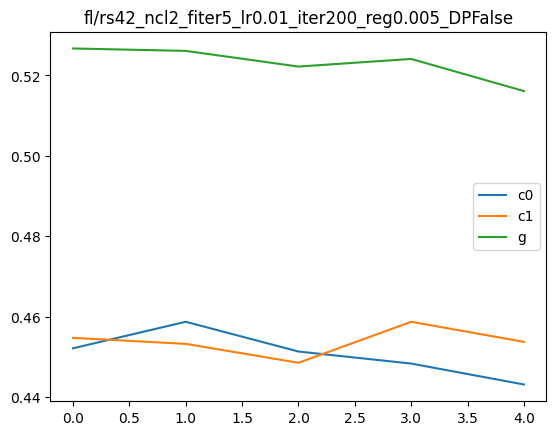

In [119]:
for i in results:
    if '_ncl2_' not in i:
        continue
    if 'DPFalse' not in i:
        continue
    
    m = max(results[i].loc[results[i]['client']==c]['1'])
    if m>0.5:
        print(i)
        print(m)
        clients = results[i]['client'].unique()
        iterations = results[i]['it'].unique()
        plt.figure()
        plt.title(i)
        for c in clients:
    #         print(iterations)
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['1'], label=c)
        plt.legend()
        name = i.replace('fl/', '')
#         plt.savefig(f'figures/fl/noDP/{name}.png')
#         results[i].to_csv(f'figures/fl/noDP/{name}.csv')

    #     break

fl/rs42_ncl2_fiter5_lr0.01_iter200_reg1e-05_DPTrue_eps100000_L10
0.4678
fl/rs42_ncl2_fiter5_lr0.005_iter300_reg1e-05_DPTrue_eps100000_L5
0.4723
fl/rs42_ncl2_fiter5_lr0.01_iter300_reg1e-05_DPTrue_eps100000_L10
0.4962


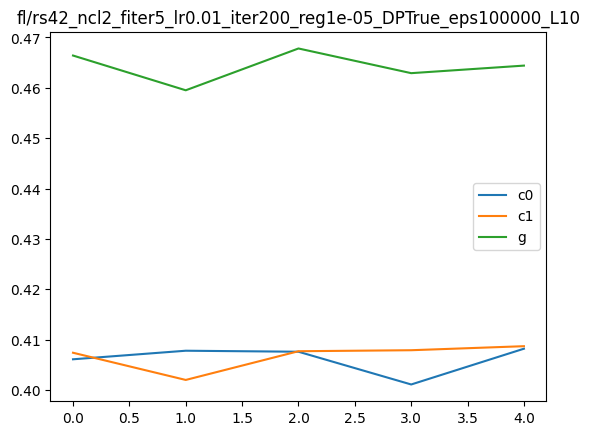

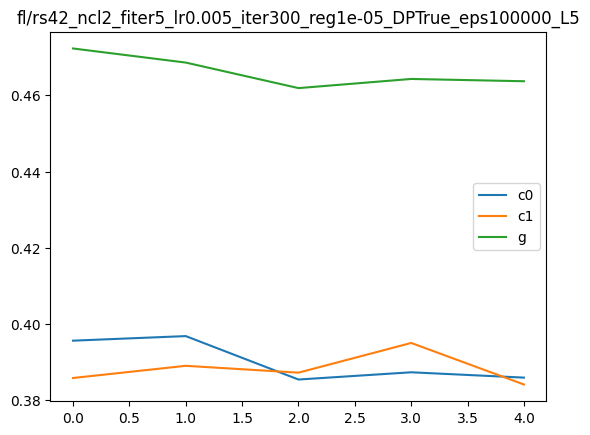

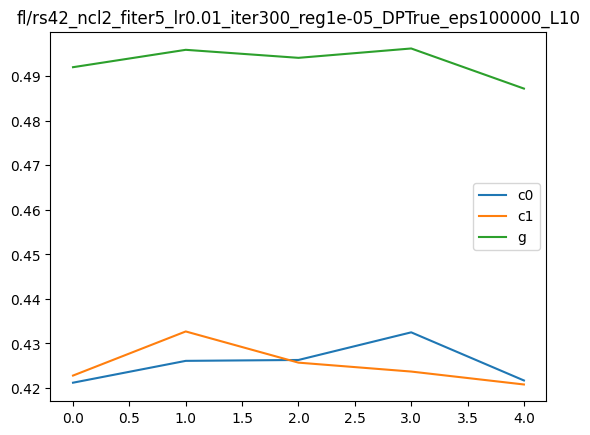

In [121]:
for i in results:
    if '_ncl2_' not in i:
        continue
    if 'DPTrue' not in i:
        continue
    
    m = max(results[i].loc[results[i]['client']==c]['1'])
    if m>0.45:
        print(i)
        print(m)
        clients = results[i]['client'].unique()
        iterations = results[i]['it'].unique()
        plt.figure()
        plt.title(i)
        for c in clients:
    #         print(iterations)
            plt.plot([int(i) for i in iterations], results[i].loc[results[i]['client']==c]['1'], label=c)
        plt.legend()
        name = i.replace('fl/', '')
#         plt.savefig(f'figures/fl/noDP/{name}.png')
#         results[i].to_csv(f'figures/fl/noDP/{name}.csv')

    #     break